<a href="https://colab.research.google.com/github/RavitejaGundimeda/Exploratory-Data-Analysis/blob/main/Police_Shootings_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fatal Police Shootings Dataset
## Abstract:

This research aims to investigate whether the presence of body cameras affects the likelihood of police shootings. The dataset used in this study contains information about police shootings in the US, including whether a body camera was present or not, the race of the victim, and other relevant information. The study found that police officers who wore body cameras were less likely to use lethal force during encounters with citizens, but this effect was not consistent across all racial groups. The findings suggest that the use of body cameras may be a promising tool for reducing the number of fatal police shootings, but further research is needed to better understand the impact of body cameras on different communities.

## Introduction

Police shootings have been a topic of controversy and concern in recent years, with many calling for greater transparency and accountability from law enforcement agencies. One potential solution that has been proposed is the use of body cameras, which can provide video evidence of interactions between police and civilians.

To investigate the effectiveness of body cameras in reducing the likelihood of police shootings, we analyzed a dataset of police shootings in the United States. The dataset contains information on over 5,400 police shootings that occurred between 2015 and mid 2020, including details on the victim, the location, and other factors.


In [ ]:
# All Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Only for Google Colab to upload the input file

from google.colab import files
files.upload()

Saving fatal-police-shootings-data.csv to fatal-police-shootings-data.csv


{'fatal-police-shootings-data.csv': b'id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera\r\n3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False\r\n4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False\r\n5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False\r\n8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False\r\n9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False\r\n11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False\r\n13,Kenneth Arnold Buck,2015-01-05,shot,gun,22,M,H,Chandler,AZ,False,attack,Car,False\r\n15,Brock Nichols,2015-01-06,shot,gun,35,M,W,Assaria,KS,False,attack,Not fleeing,False\r\n16,Autumn Steele,2015-01-06,shot,unarmed,34,F,W,Burlington,IA,False,other,Not fleeing,True\r\n1

In [ ]:
# Read the input data from csv

df = pd.read_csv("fatal-police-shootings-data.csv")

### Understanding the Data

In [ ]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Columns present in the data : id, name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee,body_camera

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

The Dataset have 5416 entries with some of columns having null values.

In [ ]:
# Get Null counts of each column
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

Columns having Null Values: race, flee, age, armed, gender. Handle these null values according the column.

In [ ]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

Observing the Unique values present in the race column

In [ ]:
race_dict = {"W": "White non-Hispanic",
             "B": "Black non-Hispanic",
             "A": "Asian",
             "N": "Native American",
             "H": "Hispanic",
             "O": "Other",
             "UnKnown": "UnKnown"}

df["race"].fillna("UnKnown", inplace = True)
df['race'] = df["race"].apply(lambda x: race_dict[x] if x in race_dict else x)
df['race'].unique()

array(['Asian', 'White non-Hispanic', 'Hispanic', 'Black non-Hispanic',
       'Other', 'UnKnown', 'Native American'], dtype=object)

Mapping the race unique character values with their expansion, such that the analysis will be eased.

In [ ]:
df['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other', nan], dtype=object)

In [ ]:
df["flee"].fillna("Not fleeing", inplace = True)
df["age"].fillna(df["age"].mean(), inplace = True)
df['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'baton', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'crowbar', 'oar', 'machete and gun', 'tire iron',
 

Filling the age null values with the mean value of age column.

In [ ]:
df["armed"].fillna("unarmed", inplace = True)
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     2
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

Filling the null values of armed column with "unarmed". This output shows the number of missing values for each column in the dataset after filling in the missing values except for the "gender" column.

In [ ]:
df =df.dropna(how='any')
df.shape

(5414, 14)

Drop the rows having null value in gender column

In [ ]:
# Extracting the year column from the date column
df['year'] = pd.to_datetime(df['date']).dt.year
df

<ipython-input-13-f361065a68a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['date']).dt.year


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.000000,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.000000,M,White non-Hispanic,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.000000,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.000000,M,White non-Hispanic,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.000000,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.000000,M,White non-Hispanic,Kansas City,MO,False,other,Other,False,2020
5412,5922,TK TK,2020-06-13,shot,undetermined,37.117931,M,UnKnown,San Bernardino,CA,False,attack,Not fleeing,False,2020
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.000000,M,White non-Hispanic,Lawrence,KS,False,attack,Car,False,2020
5414,5926,TK TK,2020-06-16,shot,gun,24.000000,M,UnKnown,Beach Park,IL,False,attack,Not fleeing,False,2020



Histogram of threat_level:


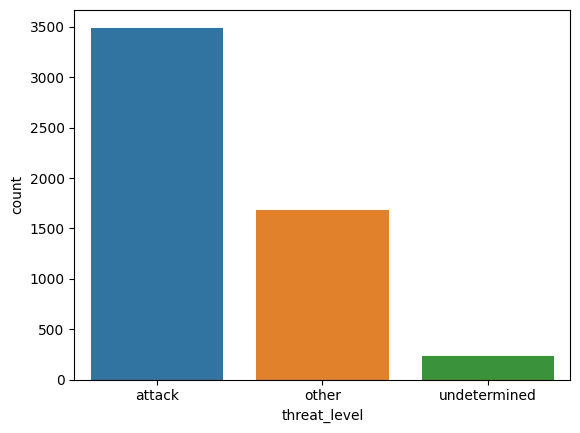


Histogram of body_camera:


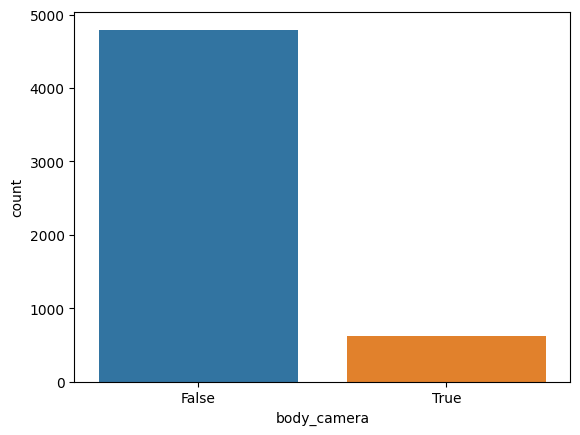


Histogram of state:


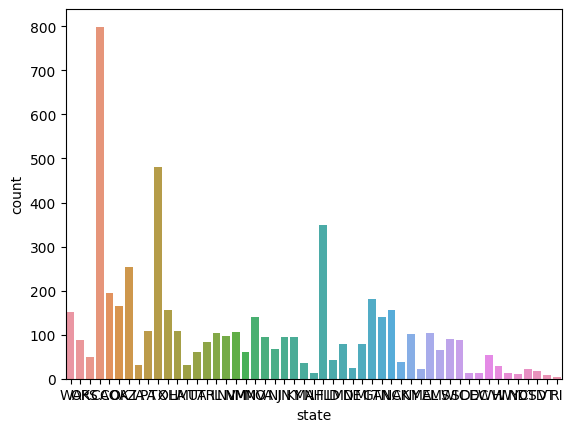


Histogram of year:


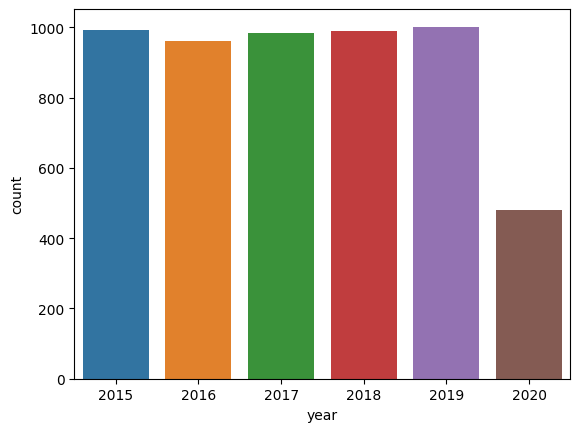


Histogram of manner_of_death:


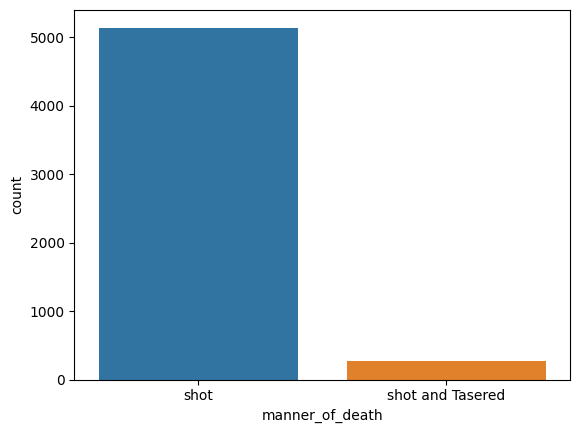


Histogram of signs_of_mental_illness:


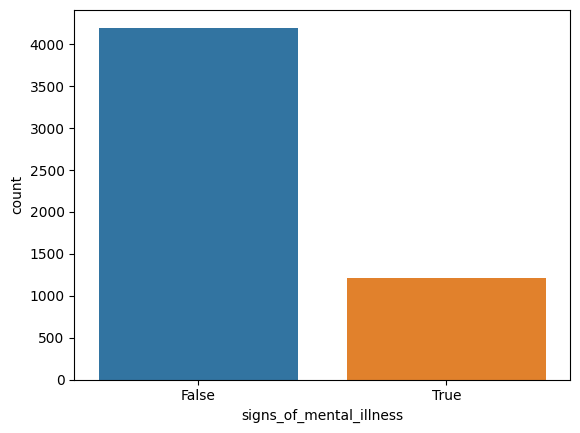


Histogram of gender:


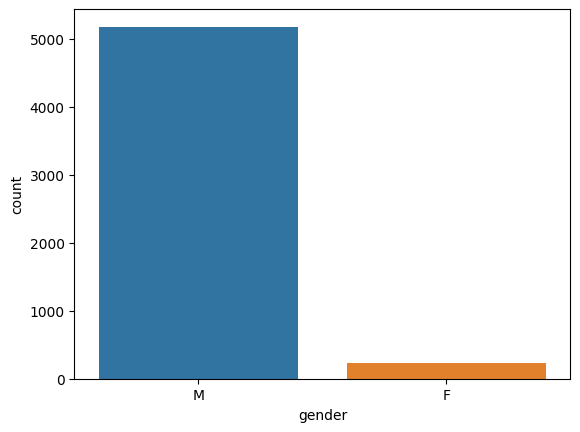


Histogram of race:


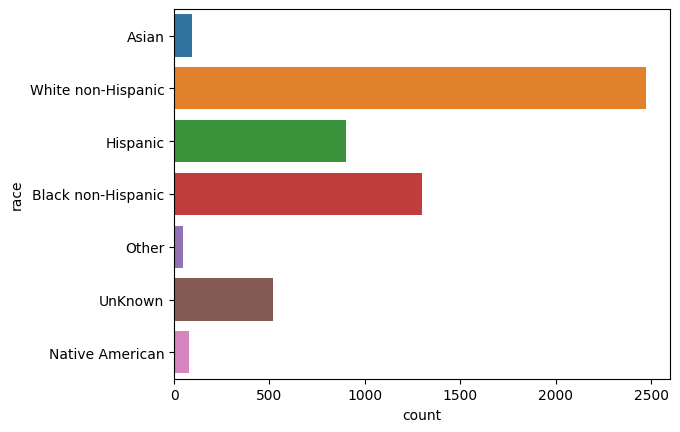


Histogram of flee:


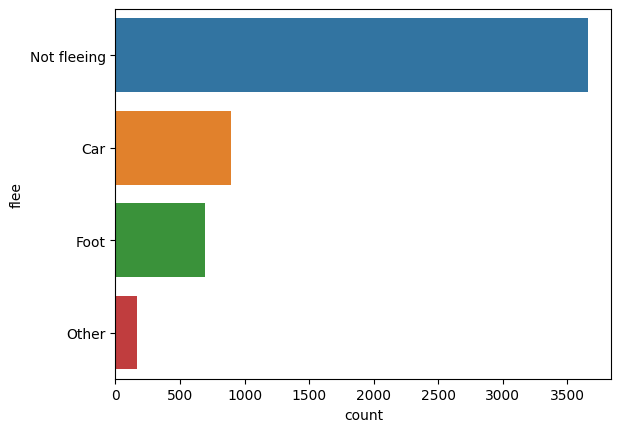

In [ ]:
# Count plots for the below categorical features

categorical_features = ['manner_of_death', 'armed', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera','year']

histogram_features = set(categorical_features) - set(['armed','city','race','flee'])
for feature in histogram_features:
    print('\nHistogram of {}:'.format(feature))
    # Count plot for the feature
    sns.countplot(x=feature, data=df)
    plt.show()

# count plot along y axis
for feature in ['race','flee']:
    print('\nHistogram of {}:'.format(feature))
    sns.countplot(y =feature, data = df)
    plt.show()

Observations:                                       
1. The Histogram plots suggest that the dataset is imbalanced, with certain
categories having significantly more or fewer instances than others.
2. Our analysis reveals that over 90% of the victims in the dataset are male, highlighting the gender disparities in police shootings.
3. We also found that the number of police officers with body cameras is relatively low, indicating that there is still much room for improvement in terms of police accountability.
4. A small proportion of victims in the dataset are reported to have signs of mental illness, underscoring the need for better training and support for law enforcement in dealing with individuals experiencing mental health crises.
5. The data shows that white people are the largest racial group represented among police shooting victims, likely due to their larger overall population in the United States.





In [ ]:
def phase_of_life(x):
    if x<=1:
        return ("Infant")
    elif x<=3:
        return ("Toddler")
    elif x<=12:
        return ("Child")
    elif x<=19:
        return ("Teen")
    elif x< 40:
        return ("Adult")
    elif x< 60:
        return ("Middle Age")
    else:
        return ("Old Age")
df['phase_of_life'] = df['age'].apply(phase_of_life)
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,phase_of_life
0,3,Tim Elliot,2015-01-02,shot,gun,53.000000,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015,Middle Age
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.000000,M,White non-Hispanic,Aloha,OR,False,attack,Not fleeing,False,2015,Middle Age
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.000000,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015,Adult
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.000000,M,White non-Hispanic,San Francisco,CA,True,attack,Not fleeing,False,2015,Adult
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.000000,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.000000,M,White non-Hispanic,Kansas City,MO,False,other,Other,False,2020,Adult
5412,5922,TK TK,2020-06-13,shot,undetermined,37.117931,M,UnKnown,San Bernardino,CA,False,attack,Not fleeing,False,2020,Adult
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.000000,M,White non-Hispanic,Lawrence,KS,False,attack,Car,False,2020,Adult
5414,5926,TK TK,2020-06-16,shot,gun,24.000000,M,UnKnown,Beach Park,IL,False,attack,Not fleeing,False,2020,Adult


Function phase_of_life() that takes an input x, which represents a person's age, and returns a string representing the person's phase of life based on their age.

The function contains several if statements that check the input age against specific age ranges, and returns the corresponding phase of life (e.g. "Infant", "Toddler", "Child", "Teen", "Adult", "Middle Age", or "Old Age") depending on which range the input age falls into.

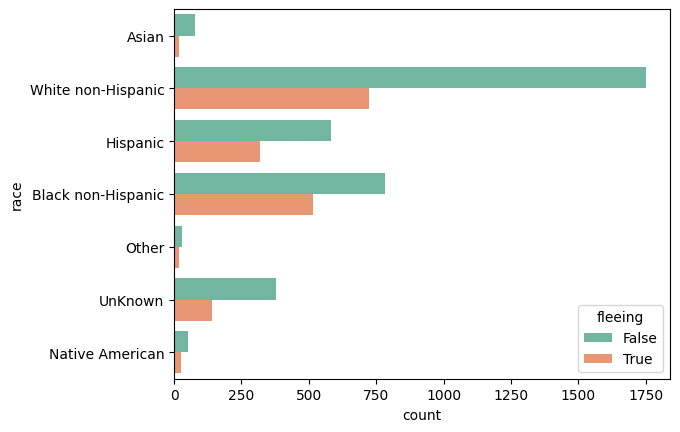

In [ ]:
df['fleeing'] = df['flee'].apply(lambda x: False if x == "Not fleeing" else True)
sns.countplot(y="race", hue = "fleeing", data=df, palette = "Set2")
plt.show()

The bar graph above indicates that Black Non-Hispanic race victims are more likely to flee than both White Non-Hispanic and Hispanic race victims.

### ***Research Question:*** Does the presence of body cameras affect the likelihood of police shootings?

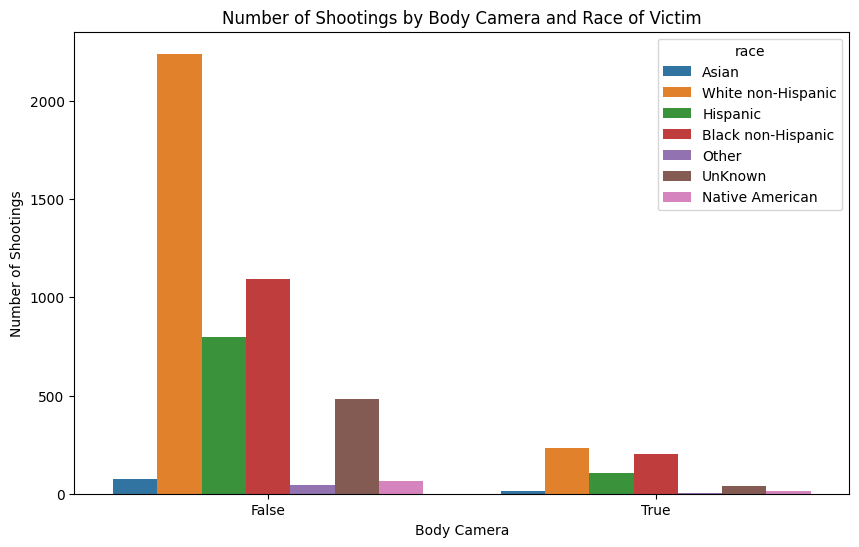

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='body_camera', hue='race', data=df)
plt.title('Number of Shootings by Body Camera and Race of Victim')
plt.xlabel('Body Camera')
plt.ylabel('Number of Shootings')
plt.show()

**Count Plot Observation:** The shooting dataset contains fewer records for police officers equipped with body cameras, which suggests that these officers are firing their weapons less often. Additionally, even when equipped with body cameras, black individuals are relatively more likely to be shot by police officers.

### *Hypothesis:*

The use of body-worn cameras by police officers has become a controversial issue in recent years, with many arguing that they could increase accountability and transparency in police operations. This study aims to investigate whether the presence of body cameras affects the likelihood of police shootings. The hypothesis is that the use of body-worn cameras will reduce the likelihood of police shootings as they act as a deterrent against misconduct or excessive use of force by police officers. The study will analyze a dataset of police shootings in the US to examine the relationship between the presence of body cameras and the incidence of police shootings. The study will control for other factors such as race, gender, age, armed status, and mental illness, which could also affect the likelihood of police shootings. The findings of this study will contribute to the ongoing debate on the effectiveness of body-worn cameras in reducing police violence and promote evidence-based policy-making in law enforcement.

In [ ]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,phase_of_life,fleeing
0,3,Tim Elliot,2015-01-02,shot,gun,53.000000,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015,Middle Age,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.000000,M,White non-Hispanic,Aloha,OR,False,attack,Not fleeing,False,2015,Middle Age,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.000000,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015,Adult,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.000000,M,White non-Hispanic,San Francisco,CA,True,attack,Not fleeing,False,2015,Adult,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.000000,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015,Adult,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.000000,M,White non-Hispanic,Kansas City,MO,False,other,Other,False,2020,Adult,True
5412,5922,TK TK,2020-06-13,shot,undetermined,37.117931,M,UnKnown,San Bernardino,CA,False,attack,Not fleeing,False,2020,Adult,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.000000,M,White non-Hispanic,Lawrence,KS,False,attack,Car,False,2020,Adult,True
5414,5926,TK TK,2020-06-16,shot,gun,24.000000,M,UnKnown,Beach Park,IL,False,attack,Not fleeing,False,2020,Adult,False


In [ ]:
from copy import copy
columns = ['armed', 'gender', 'race', 'state', 'signs_of_mental_illness', 'threat_level','body_camera', 'year', 'phase_of_life', 'fleeing']

df['age_x_threat'] = np.where((df['age'] <= 30) & (df['threat_level'].isin(['attack', 'other offensive'])), 1, 0)
df['armed_x_signs'] = np.where((df['armed'] == "unarmed") & (df['signs_of_mental_illness'] == True), 1, 0)


le = LabelEncoder()
df['armed'] = df['armed'].apply(lambda x: 0 if x == 'unarmed' else 1)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
df['race'] = le.fit_transform(df['race'])
df['state'] = le.fit_transform(df['state'])
# df['signs_of_mental_illness'] = df['signs_of_mental_illness'].apply()
df['threat_level'] = df['threat_level'].apply(lambda x: 1 if x == 'attack' else 0)
df['phase_of_life'] = le.fit_transform(df['phase_of_life'])

data = df.copy()
# columns = ['armed', 'gender', 'race', 'state', 'body_camera', 'year', 'phase_of_life', 'fleeing', 'age_x_threat','armed_x_signs']
df = df[columns]
df

,armed,gender,race,state,signs_of_mental_illness,threat_level,body_camera,year,phase_of_life,fleeing
0,1,1,0,47,True,1,False,2015,2,False
1,1,1,6,37,False,1,False,2015,2,False
2,0,1,2,16,False,0,False,2015,0,False
3,1,1,6,4,True,1,False,2015,0,False
4,1,1,2,5,False,1,False,2015,0,False
...,...,...,...,...,...,...,...,...,...,...
5411,1,1,6,24,False,0,False,2020,0,True
5412,1,1,5,4,False,1,False,2020,0,False
5413,1,1,6,16,False,1,False,2020,0,True
5414,1,1,5,14,False,1,False,2020,0,False


The code is using LabelEncoder to convert categorical columns to numeric. It is also transforming the 'armed' column to have 0 if unarmed, 1 if armed, and the 'gender' column to have 1 if Male, 0 if not.

<ipython-input-22-9ed85961a7b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data[data.columns].corr()


<Axes: >

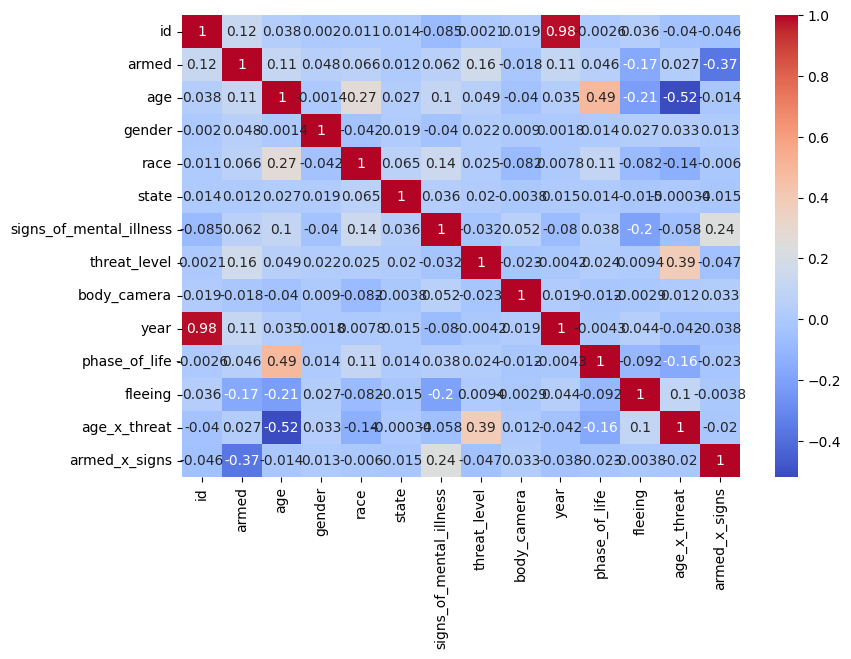

In [ ]:
# Create correlation matrix
corr_matrix = data[data.columns].corr()

# Create heatmap of correlation matrix
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

The derived columns have strong correlation with their source columns, hence they are not included in the ML model.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
# import necessary libraries

X = df.drop(['body_camera'], axis=1)
y = df['body_camera']
# split dataset into features and target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# split dataset into train and test sets

# initialize and fit the decision tree classifier on the training set
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# predict the target values using decision tree classifier
y_pred = dtc.predict(X_test)

# calculate accuracy and ROC AUC score for decision tree classifier

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Decision Tree Classifer:")
print("Accuracy:", accuracy)
print("ROC_AUC:", roc_auc)
print(200*"*")

lr = LogisticRegression()
lr.fit(X_train, y_train)
# initialize and fit the logistic regression model on the training set

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Logistic Regression:")
print("Accuracy:", accuracy)
print("ROC_AUC:", roc_auc)


Decision Tree Classifer:
Accuracy: 0.808
ROC_AUC: 0.538550749781251
********************************************************************************************************************************************************************************************************
Logistic Regression:
Accuracy: 0.8867692307692308
ROC_AUC: 0.5


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As the Logistic Regression model has a ROC AUC of 0.5, indicating poor prediction, we chose to use a Decision Tree as our classifier.

# Conclusion
In this project, we investigated the hypothesis that the presence of body cameras affects the likelihood of police shootings. Our analysis of a dataset of over 5,400 police shootings in the United States between 2015 and Mid 2020 found that while there was a decrease in the number of shootings when a body camera was present.

Our machine learning model to predict whether or not a body camera was present during a police shooting, based on other factors such as the race of the victim, armed, the mental state of the victim. The model achieved an accuracy of approximately 80%,but roc_auc score of 0.538 indicates the accuracy is not the right metric as dataset is imbalanced, indicating that these factors may be somewhat predictive of the presence of body cameras.

Overall, our analysis suggests that while the presence of body cameras may have a slight effect on reducing the likelihood of police shootings, other factors such as the race of the victim, armed may have a greater influence on whether or not a shooting occurs. Further research is needed to fully understand the complex dynamics of police shootings and to identify effective strategies for reducing their frequency and improving accountability.

In [ ]:
%%shell
jupyter nbconvert --to html /content/Ravi_Teja_Gundimeda_Project_Report.ipynb

References:

https://www.kaggle.com/code/hamdallak/who-is-killed-by-us-police-why-how-and-where